In [1]:
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


In [2]:
base_dir = r'D:\studydata\machine_bild_learn\AI\tensorflow\catsdogs'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

train_dir_cats = os.path.join(train_dir, 'Cat')
train_dir_dogs = os.path.join(train_dir, 'Dog')


validation_dir_cats = os.path.join(validation_dir, 'Cat')
validation_dir_dogs = os.path.join(validation_dir, 'Dog')


In [3]:
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.applications.resnet import ResNet101
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [4]:
pre_trained_model = ResNet101(input_shape=(75, 75, 3),
                                include_top=False,
                                weights='imagenet')

In [5]:
#pre_trained_model = ResNet50(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
#pre_trained_model = ResNet101(input_shape=(75, 75, 3), include_top=False, weights='imagenet')
#pre_trained_model = InceptionV3(input_shape=(150, 150, 3), include_top=False, weights='imagenet')

In [6]:
for layers in pre_trained_model.layers:
    layers.trainable = False

In [7]:
class tensor_callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.95:
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training = True

In [8]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

x = layers.Flatten()(pre_trained_model.output)

x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = models.Model(pre_trained_model.input, x)
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

c:\Users\28968\.conda\envs\mlflow\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [9]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,   
                                                    target_size=(75, 75),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(75, 75),
                                                        batch_size=20,
                                                        class_mode='binary')








Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [12]:
callbacks = tensor_callback()
history = model.fit(train_generator,
                                validation_data=validation_generator,
                                steps_per_epoch=8,
                                epochs=20,
                                verbose=2,
                                callbacks=[callbacks])

Epoch 1/20
8/8 - 1s - loss: 0.7198 - accuracy: 0.5500 - val_loss: 0.7095 - val_accuracy: 0.5250
Epoch 2/20
8/8 - 1s - loss: 0.7667 - accuracy: 0.4938 - val_loss: 0.6879 - val_accuracy: 0.5450
Epoch 3/20
8/8 - 1s - loss: 0.7423 - accuracy: 0.5625 - val_loss: 0.7405 - val_accuracy: 0.4975
Epoch 4/20
8/8 - 1s - loss: 0.8427 - accuracy: 0.4563 - val_loss: 0.7803 - val_accuracy: 0.5000
Epoch 5/20
8/8 - 1s - loss: 0.7987 - accuracy: 0.5000 - val_loss: 0.7022 - val_accuracy: 0.5100
Epoch 6/20
8/8 - 1s - loss: 0.6862 - accuracy: 0.5625 - val_loss: 0.6867 - val_accuracy: 0.5400
Epoch 7/20
8/8 - 1s - loss: 0.6782 - accuracy: 0.5875 - val_loss: 0.6950 - val_accuracy: 0.5125
Epoch 8/20
8/8 - 1s - loss: 0.7349 - accuracy: 0.4500 - val_loss: 0.7003 - val_accuracy: 0.5125
Epoch 9/20
8/8 - 1s - loss: 0.7367 - accuracy: 0.5437 - val_loss: 0.7155 - val_accuracy: 0.5000
Epoch 10/20
8/8 - 1s - loss: 0.7417 - accuracy: 0.5000 - val_loss: 0.6810 - val_accuracy: 0.5525
Epoch 11/20
8/8 - 1s - loss: 0.6983 - a

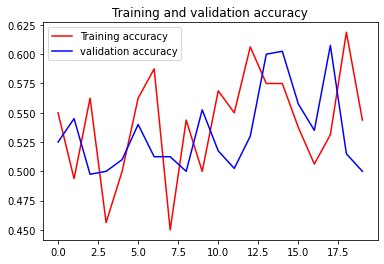

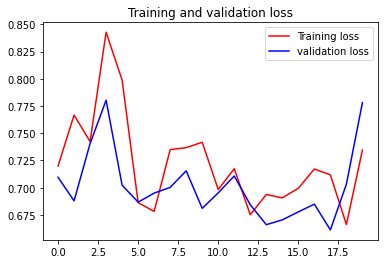

In [13]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()
